<a href="https://colab.research.google.com/github/codelspak/Struggles/blob/main/WK26_case1_Kaggle_ML_Classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study case1. 싸이킷런 내장 iris 데이터 이용 - Kaggle 노트북 필사
https://www.kaggle.com/code/lalitharajesh/iris-dataset-exploratory-data-analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# 데이터 불러오기
from sklearn.datasets import load_iris

# 머신러닝 모델링 (학습/예측)
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# 1. 라이브러리 및 데이터셋 불러오기
##### scikit learn 내장 iris 데이터 이용해줄거임
##### 보면 이 빌트인 데이터는, Bunch라는 매우 낯선 형태의 자료구조를 갖는 걸 알 수 있음 (key-value 형식으로, dictionary형 타입과 유사함)


In [2]:
# sklearn 내장 데이터 불러옴
# 참고 블로그
print('https://blog.naver.com/PostView.naver?blogId=pmw9440&logNo=221846636945')

https://blog.naver.com/PostView.naver?blogId=pmw9440&logNo=221846636945


In [3]:
from sklearn.datasets import load_iris

data = load_iris()
type(data)

sklearn.utils.Bunch

# 2. Iris 데이터 EDA

### 2-1. scIkit-learn built-in dataset 특징
    1. features, response가 분리된 객체로 존재함 (data.data, data.target 처럼)
    2. features, response 모두 수치형 데이터임
    3. features, response 모두 NumPy arrays로 존재함
    4. 특정 shape을 가짐 

##### 참고. 싸이킷런 내장데이터는 이런 정보들을 가지고 있음 (length = 8)

In [4]:
print(type(data.data))
display(data.data[:5])

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
data.data_module

'sklearn.datasets.data'

In [6]:
type(data.DESCR) # str
data.DESCR.split("\n")

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '                ',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    pe

In [7]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data.filename

'iris.csv'

In [9]:
data.frame

In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### 참고. 머신러닝 Terminology
    1. a row : observation/sample/instance/record
    2. a column : feature/predictor/attribute/independent variable/input/regressor/covariate(공변량: 여러 변수가 공통적으로 공유하고 있는 변량)
    3. a response : target/outcome/label/dependent variable
        - if response == categorical : 
            ML problem = classification
        - if response == ordered and continuous :  
            ML problem = regression

### 2-2. 데이터 정보 확인(shape/features/responses)

In [12]:
# bunch object : iris dataset과 attributes를 포함하고 있음
data.data.shape, data.target.shape

((150, 4), (150,))

In [13]:
# data type
type(data.data), type(data.target)

(numpy.ndarray, numpy.ndarray)

In [14]:
print(data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
data.target_names.tolist()

['setosa', 'versicolor', 'virginica']

In [16]:
print(set(data.target))
display(pd.DataFrame(data.target).value_counts())

{0, 1, 2}


0    50
1    50
2    50
dtype: int64

### 2-3. Plotting

산점도 그리기 위해, features' value 뽑아내서 list에 저장해줌

In [17]:
features = data.data[:, [0,1,2,3]] # data.data랑 그냥 같음. type도 np.arrays로 동일하지만, 필요할 경우 일부 컬럼만 뽑아쓸 수 있도록 컬럼 리스트를 지정해준 듯
features.shape

(150, 4)

In [18]:
targets = data.target
targets.shape # (150,)

targets.reshape(targets.shape[0], -1).shape # (150,1) # targets.reshape : Returns an array containing the same data with a new shape (예시: a.reshape(shape, order='C'))

(150, 1)

### 2-4. Target - Features 간 관계 시각화

In [19]:
# 꽃잎, 꽃받침 정보 모두 통합한, 일종의 파생변수 생성해줌
list_features_sum = [ [sample[0] + sample[1] + sample[2] + sample[3]] for sample in features]
list_features_sum[:5]

[[10.2], [9.5], [9.4], [9.399999999999999], [10.2]]

Text(0, 0.5, 'Targets - kinds of Iris (encoded)')

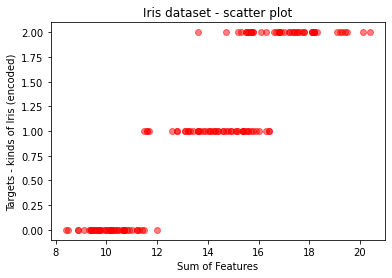

In [20]:
# scatterplot
plt.scatter(x = list_features_sum, y = targets, color = 'red', alpha = 0.5) # y = 0 or 1 or 2
plt.rcParams['figure.figsize'] = [8,4]
plt.title('Iris dataset - scatter plot')
plt.xlabel('Sum of Features')
plt.ylabel('Targets - kinds of Iris (encoded)')


### 2-5. Feature - Feature 간 관계 시각화

In [21]:
feature_names = [ name[:-4].strip() for name in data.feature_names]
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [22]:
print(feature_names)
display(features[:3])

['sepal length', 'sepal width', 'petal length', 'petal width']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [23]:
# 각 feature 별 value 리스트에 담아줌
sep_len = [value[0] for value in features]
sep_wid = [value[1] for value in features]
pet_len = [value[2] for value in features]
pet_wid = [value[3] for value in features]
len(sep_len), len(sep_wid),len(pet_len),len(pet_wid)

(150, 150, 150, 150)

아래 셀에서 리스트 말고 튜플을 사용해줌 
##### 불변의 값에 대해서, 튜플이 (1) 빠르고 (2) 메모리를 적게 잡아먹기 때문 :)

In [24]:
kinds = ('Iris-setosa','Iris-versicolor','Iris-virginica')
colors = ('blue', 'green', 'red') # 종류 별로 다르게 색상 표현

# Sepal Length - Sepal Width 관계
iris_sep_lw = (
    (sep_len[:50], sep_wid[:50]), 
    (sep_len[50:100], sep_wid[50:100]),
    (sep_len[100:150], sep_wid[100:150]),
)
# Petal Length - Petal Width 관계
iris_pet_lw = (
    (pet_len[:50], pet_wid[:50]), 
    (pet_len[50:100], pet_wid[50:100]),
    (pet_len[100:150], pet_wid[100:150]),
)


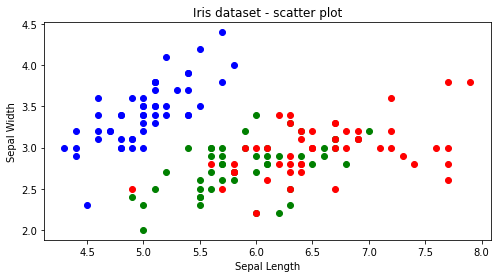

In [25]:
# scatterplot 
# Sepal Length - Sepal Width 관계
for kind, color, iris_data in zip(kinds, colors, iris_sep_lw):
    sep_len, sep_wid = iris_data
    plt.scatter(x = sep_len, y = sep_wid, color = color, alpha = 1, )
    plt.title('Iris dataset - scatter plot')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

plt.show()

# 범례 넣어주고 싶으면, plt.legend() 쓸 수 있는데. 여기서는 plt.scatter할 때 각각 지정해준 게 아니라서 안 되넹

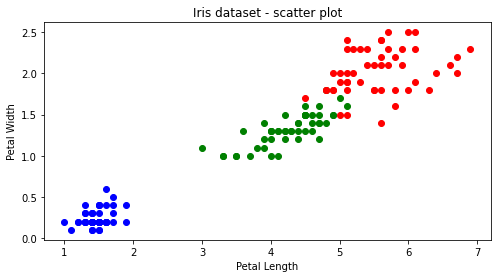

In [26]:
# scatterplot 
# Petal Length - Petal Width 관계
for kind, color, iris_data in zip(kinds, colors, iris_pet_lw):
    sep_len, sep_wid = iris_data
    plt.scatter(x = sep_len, y = sep_wid, color = color, alpha = 1)
    plt.title('Iris dataset - scatter plot')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

plt.show()


# 3. Modeling, Training and Testing

### 3-1. 알고리즘 불러오기

#### 3-1-0. iris data (Bunch object) > DataFrame에 저장해줌 (df_iris)


In [27]:
df_iris = pd.DataFrame(data.data)
df_iris.columns = feature_names
df_iris['target_species'] = data.target
df_iris.sample(3)

,sepal length,sepal width,petal length,petal width,target_species
73,6.1,2.8,4.7,1.2,1
8,4.4,2.9,1.4,0.2,0
47,4.6,3.2,1.4,0.2,0


In [28]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width,target_species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


####  3-1-1. K - Nearest Neighbors (KNN)
##### 지도/비지도 학습 모두에 사용 가능함
    1) 지도학습
        - classification for data with discrete labels
        - regression for data with continuous labels
    2) 비지도학습
        - the foundation of many other learning methods
            : notably manifold learningand spectral clustering.

##### KNeighborsClassifier parameter 설명
    1. n_neighbors : 근접한 이웃의 개수 k
    2. weights : 거리별 가중치
        - 'uniform': 이웃의 거리가 멀고 가까운 것에 대한 가중치를 두지 않고 단순 거리 계산
        - 'distance' : 거리 계산 시, 이웃의 거리가 가까우면 가중치를 더 줌
         (가중치는 각 이웃 간 거리의 역수)
        - p : 거리지표
            - p = 1 : 맨하튼 거리
            - p = 2 : 유클리드 거리
            - 그 외 : 민코프스키 거리(Minkowski distance)의 공식을 적용

##### 참고. 회귀와 분류 - 성능평가 지표 차이
지도학습 | 기준모델(Baseline) | 성능평가지표(Evaluation Metric)
--|--|--
회귀(Regression) | 오차(실제값-예측값) 평균| MAE, MSE, R-square
분류(Classification) | 최빈값(Majority) | Confusion Matrix<br>Accuracy<br>Precision<br>Recall<br>F1 Score<br> ROC AUC

1) Knn 모델 피팅

In [29]:
# from sklearn import neighbors, datasets
# from matplotlib.colors import ListedColormap
# from sklearn.metrics import confusion_matrix

X_sepal = data.data[:, :2] # sepal length/width in arrays (data = datasets.load_iris())
y_iris_kinds = data.target

# Classifier 모델 구축
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X_sepal,y_iris_kinds)
# 분류 결과 예측
y_pred = clf.predict(X_sepal)

# 학습된 모델의 성능을 평가 
confusion_matrix(y_iris_kinds,y_pred) 

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 10, 40]])

##### 참고. Confusion Matrix 
분류 문제에 쓰이는 성능 평가 지표 중 하나로, 입력값 X에 따른 y의 예측값들을 행렬로 나타낸 것 
##### 모델의 성능지표인 Accuracy, Precision, Recall, F1 Score 계산 가능
    1. Accuracy = correct pred / all predictions
    2. Precision = TP / all postive predictions(=TP+FP)
    3. Recall = TP / all positive observations(=TP+FN) 
        - 민감도(Sensitivity), PR(True Positive Rate)라고 불리기도 함
##### [참고]('https://gggggeun.tistory.com/17')

In [30]:
clf

KNeighborsClassifier()

In [31]:
# from sklearn.metrics import classification_report
print(classification_report(y_iris_kinds, y_pred, target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        50
Iris-versicolor       0.77      0.74      0.76        50
 Iris-virginica       0.75      0.80      0.78        50

       accuracy                           0.84       150
      macro avg       0.84      0.84      0.84       150
   weighted avg       0.84      0.84      0.84       150



Cross-validation을 통해 최적의 k를 찾아줄 수 있음 (얘는 링크한 블로그 내용 참고해서 추가함)
[참고한 블로그](https://velog.io/@guns/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%8A%A4%ED%84%B0%EB%94%94-3%EC%9D%BC%EC%B0%A8-K-NN-K-Nearest-Neighbor)

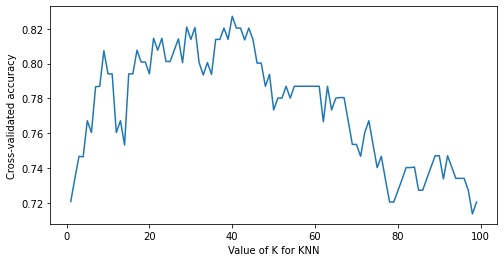

In [32]:
# from sklearn.model_selection import cross_val_score
k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_sepal, y_iris_kinds, cv = 7, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

In [33]:
df_bestk = pd.concat([(pd.Series(k_range)), pd.Series(k_scores)], axis = 1).\
rename({0:'k_value', 1:'cv_accuracy'}, axis = 1).sort_values(by = 'cv_accuracy', ascending = False)
df_bestk.head(1)


,k_value,cv_accuracy
39,40,0.827149


##### Weight 여부에 따른 Knn 분류 결과 시각화
    - K-최근접이웃 분류 결과 좌표평면에 시각화하기 위해서는 예측 변수를 2개까지만 사용 가능
    - 앞에서 선언한 X_sepal, X_petal, y_iris_kinds (2차 배열) 그대로 이용

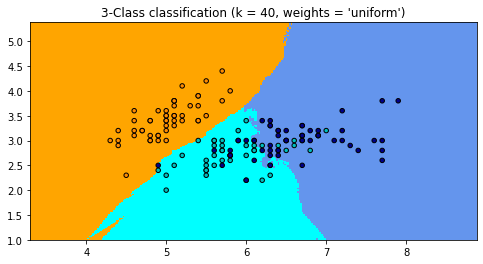

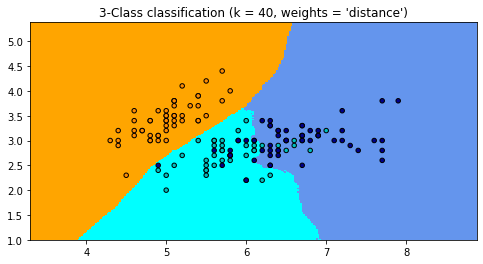

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets

n_neighbors = df_bestk.iloc[0, 0] # k


# step size in the mesh
h = .02  

# 컬러맵 생성
cmap_light = ListedColormap(['orange', 'cyan','cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # 파라미터 - 거리에 따른 weight 유무에 따라 모델링해줌
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_sepal, y_iris_kinds)

    # 분류 경계를 색으로 구분하기 위한 작업
    # 각 point를 칠해줌 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_sepal[:, 0].min() - 1, X_sepal[:, 0].max() + 1
    y_min, y_max = X_sepal[:, 1].min() - 1, X_sepal[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) # 좌표를 격자로 표현
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # 두 개 배열 붙여 하나로 만듦 (pd.concat 같이) : 결국 sepal 정보 기반으로 예측 의미

    # 분류 경계 별 색칠하기
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 각 훈련값의 좌표들을 그린 산점도
    plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y_iris_kinds, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    # 제목에 Knn 분류 파라미터와 표준 정확도 표기해줌
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))


plt.show()

In [53]:
# Petal에 대해서 반복
X_petal = data.data[:,2:] # petal length/width in arrays (data = datasets.load_iris())
y_iris_kinds = data.target

# Classifier 모델 구축
clfp = neighbors.KNeighborsClassifier(5)
clfp.fit(X_petal,y_iris_kinds)
# 분류 결과 예측
y_pred_petal = clfp.predict(X_petal)

# 학습된 모델의 성능을 평가 (입력값 X에 따른 y의 예측값들을 행렬로 나타낸 것 > 모델의 성능지표인 Accuracy, Precision, Recall, F1 Score 계산 가능)
knncm = confusion_matrix(y_iris_kinds,y_pred_petal) 
knncm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

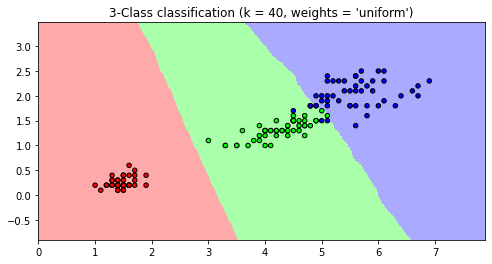

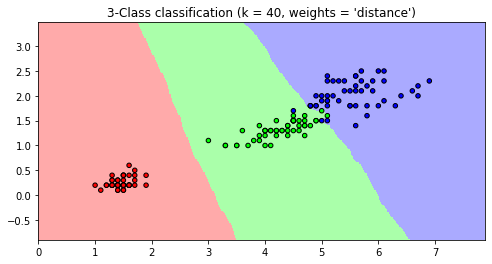

In [36]:
n_neighbors = df_bestk.iloc[0, 0] # k
h = .02  

# 컬러맵 생성
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # 파라미터 - 거리에 따른 weight 유무에 따라 모델링해줌
    clfp = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clfp.fit(X_petal, y_iris_kinds)

    # 분류 경계를 색으로 구분하기 위한 작업
    # 각 point를 칠해줌 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_petal[:, 0].min() - 1, X_petal[:, 0].max() + 1
    y_min, y_max = X_petal[:, 1].min() - 1, X_petal[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) # 좌표를 격자로 표현
    Z = clfp.predict(np.c_[xx.ravel(), yy.ravel()]) # 두 개 배열 붙여 하나로 만듦 (pd.concat 같이) : 결국 sepal 정보 기반으로 예측 의미

    # 분류 경계 별 색칠하기
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 각 훈련값의 좌표들을 그린 산점도
    plt.scatter(X_petal[:, 0], X_petal[:, 1], c=y_iris_kinds, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    # 제목에 Knn 분류 파라미터와 표준 정확도 표기해줌
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

##### 참고. numpy array 형태 변환 및 메모리 관리 관련 메소드들
    1. flatten() vs ravel()
    : 비유하자면 f = copy(), r = view() 같은 거임
      둘 다 n*m 행렬을 1*nm 행렬로 바꿔주는 함수지만, 값을 변경했을 떄 원본 행렬의 값에도 변화가 없냐 / 있냐의 차이
    2. reshape() vs resize()
        - np.reshape(a, a.new_shape), a.reshape(a.new_shape)
            : 원소 갯수와 행렬 사이즈가 정확히 맞아야 함. if else : 에러
        - resize : 비교적 더 관대함. 행렬 사이즈가 더 크면, 그냥 원소를 반복해서 넣어줌
            1) 단, np.resize(a, a.new_shape) : 일종의 copy() and then work
                원본 값에 영향 없음. 그냥 새로운 shape에 맞춰 결과값만 반환
            2) 반면, a.resize(a.new_shape) : view() and work
                원래 값 자체를 아예 변경해버림. 그리고 따로 값 자동 반환 안 함.
                따라서 b = a.resize(a.new_shape), b 등으로 따로 명령해야 함
[참고 블로그](https://yeko90.tistory.com/entry/%EB%84%98%ED%8C%8C%EC%9D%B4-%EA%B8%B0%EC%B4%88-flatten-VS-ravel-%EB%A9%94%EB%AA%A8%EB%A6%AC-%EA%B4%80%EB%A6%ACcopy-vs-view-base)

### 참고. 분류는 아니지만 회귀 모델도 같이 써 봄
##### Linear regression (y = ax + b)
##### a = slope/기울기, b = intercept/절편


In [37]:
# 모델 선언
# from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [38]:
np.asarray(list_features_sum).shape

(150, 1)

In [39]:
X_lg = np.asarray(list_features_sum)
X_lg.shape

(150, 1)

In [40]:
y_lg = data.target
y_lg.shape

(150,)

##### 참고. np.axis를 통한 차원 변경
    1. 1D array를 row vector나 column vector로 사용하고 싶을 경우 (i.g., (150,) -> (150,1))
    2. numpy broadcasting이라고 shape이 다른 array간 연산
    3. 2차원 이상의 고차원 array를 만들어냄
        (i.g., In [126]: arr_5D = arr[np.newaxis, ..., np.newaxis, np.newaxis])
        # promoting 2D array to a 5D array
        # In [127]: arr_5D.shape
        # Out[127]: (1, 5, 5, 1, 1)

    - reshape는 변환전 차원의 합과 변환후 차원의 합이 같아야 함. 
        4개의 원소를 2by2로 재배열한다는 느낌
        (4,1)을 (3,3)으로 바꿀 수는 없음




In [41]:
# 원래 예시 (X_lg 선언 관련)
# XX = np.asarray(list_features_sum) # XX.shape = (150,1)
# X2 = XX[:, np.newaxis] # 존재하는 numpy array의 차원을 늘려준다
# print(X2.shape)
# X2[:5]

##### 모델 피팅 및 학습, 예측


In [42]:
model.fit(X_lg, y_lg)


LinearRegression()

In [43]:
model.coef_, model.intercept_

(array([0.24065884]), -2.335050202713289)

In [44]:
df_iris.head(3)

,sepal length,sepal width,petal length,petal width,target_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4440484e10>,
      dtype=object)

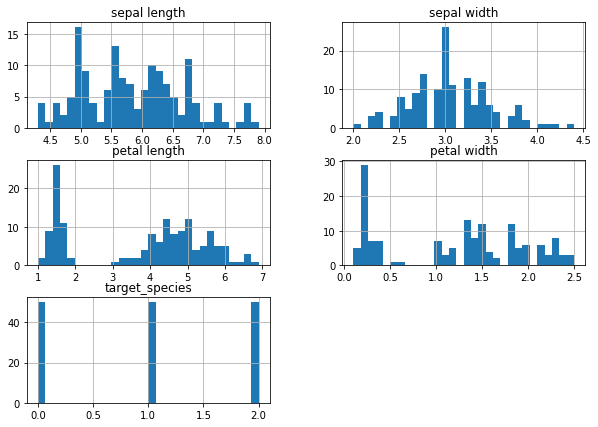

In [45]:
# histogram plot
df_iris.hist(figsize = (10,7), bins = 30)

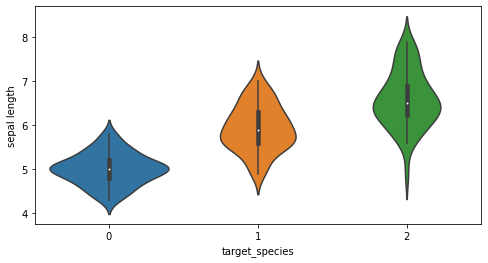

In [47]:
# violinplot
_ = sns.violinplot(data = df_iris, x = 'target_species', y = 'sepal length',)

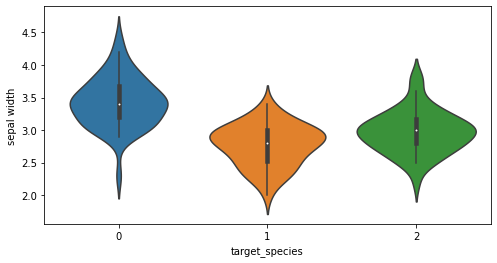

In [48]:
# violinplot
_ = sns.violinplot(data = df_iris, x = 'target_species', y = 'sepal width',)

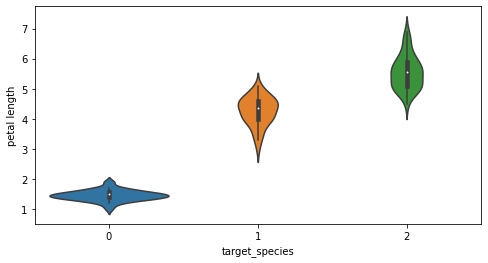

In [49]:
# violinplot
_ = sns.violinplot(data = df_iris, x = 'target_species', y = 'petal length',)

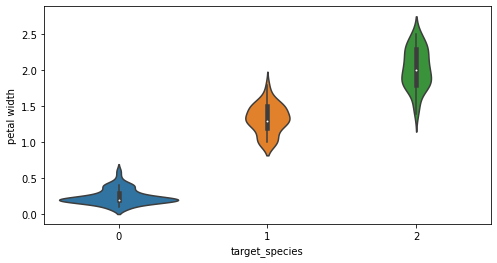

In [50]:
# violinplot
_ = sns.violinplot(data = df_iris, x = 'target_species', y = 'petal width',)

#### 상관관계 분석

상관관계가 높은 feature를 모두 가지고 모델 학습을 시키는 건 오히려 정확도를 감소시킬 수 있고, 따라서 feature selection이 매우 중요함.

In [51]:
corr = df_iris.corr()
corr

,sepal length,sepal width,petal length,petal width,target_species
sepal length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal width,0.817941,-0.366126,0.962865,1.000000,0.956547
target_species,0.782561,-0.426658,0.949035,0.956547,1.000000


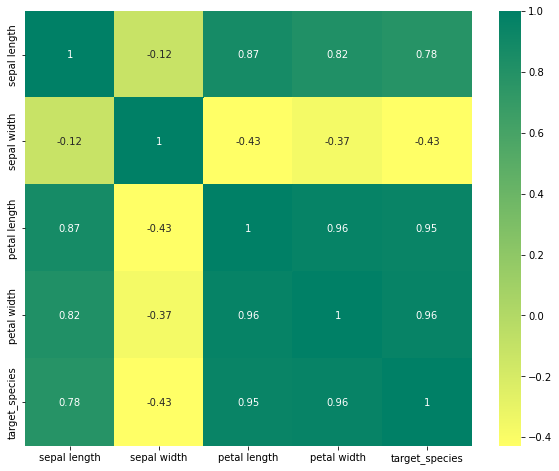

In [52]:
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values, # 눈금이름
            yticklabels=corr.columns.values,
           cmap='summer_r', annot=True)
plt.show()

위를 보면, sepal length-width는 의외로 상관관계가 없어 보임<br>
반면 petal lengh-width는 거의 양의 기울기를 갖는 상관관계를 가지며<br>
target_species, 즉 아이리스 품종과 관계가 있는 feature는 sepal length와 petal length/width 세 가지라고 생각할 수 있음


[matplotlib 그래프 그리기 - 상세](https://rfriend.tistory.com/710)

# 4. 성능 평가

In [61]:
# knn
display(df_bestk.head(1))
print("_"*100)
print(classification_report(y_iris_kinds, y_pred, target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']))

,k_value,cv_accuracy
39,40,0.827149


____________________________________________________________________________________________________
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        50
Iris-versicolor       0.77      0.74      0.76        50
 Iris-virginica       0.75      0.80      0.78        50

       accuracy                           0.84       150
      macro avg       0.84      0.84      0.84       150
   weighted avg       0.84      0.84      0.84       150



# 5. 이번 필사 과정에서 배운 점, 한계점과 향후 보완점
    1. 배운 점 : Scikit-learn built-in 데이터의 특성 (csv 파일로 저장되어 있지만, 실제로는 dictionary 형식과 비슷한 Bunch 구조를 가짐) 
        - sklearn 모듈을 이용하여 데이터 불러오기
        - NumPy.arrays 데이터 가지고 분석하기 (처음으로 차원 등을 고려해 봄)
        - 속도, 메모리 관점에서 리스트 대신 튜플을 써 봄
        - matplotlib을 이용해서 원하는 대로 그래프 그려보기
    
    2. 한계점 및 향후 보완점
        - iris 데이터 feature가 모두 수치형에, 컬럼 수가 많지 않아 다각도로 분석해 볼 여지가 많지는 않았던 듯
        - 이 노트북은 개인적으로 시각화 위주, 
        모델에 따른 성능 평가 및 해석 부분이 충분히 설명되지 않은 느낌이 듦
            -> 보완점 
                (1) Knn과 선형회귀 알고리즘 이론 추가 공부
                (2) 성능 평가 및 개선 관련해서 추가 분석해보기